In [39]:
import numpy as np
from itertools import combinations_with_replacement

In [40]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# Синтетические данные для регрессии
n = 300
X = np.random.uniform(-3, 3, size=(n, 1))
# Истинная зависимость: кубический полином + шум
y = 0.5 * X[:,0]**3 - 1.0 * X[:,0]**2 + 0.8 * X[:,0] + np.random.normal(0, 1.0, size=n)

# Добавим выбросы
idx_out = np.random.choice(n, size=10, replace=False)
y[idx_out] += np.random.normal(10, 3, size=idx_out.shape[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

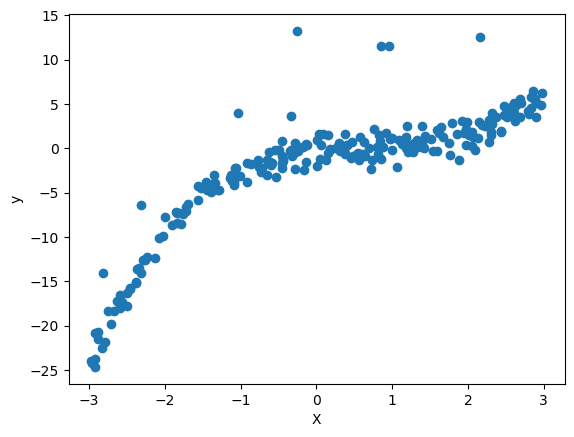

In [41]:
plt.figure()
plt.scatter(X_train[:,0], y_train)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [42]:
class MyPolynomialFeatures:
    def __init__(self, degree=2, include_bias=True):
        self.degree = degree
        self.include_bias = include_bias
        self._combination = None # will store which feature indices to multiply


    def _generate_combinations(self, n_features):
        combs = []
        for d in range(0, self.degree + 1):
            for combo in combinations_with_replacement(range(n_features), d):
                combs.append(combo)
        if not self.include_bias:
            combs = [c for c in combs if len(c) > 0]
        return combs


    def fit(self, X):
        X = np.asarray(X)
        n_samples, n_features = X.shape
        self._combination = self._generate_combinations(n_features)
        return self
    
    def transform(self, X):
        X = np.asarray(X)
        n_samples, n_features = X.shape

        if self._combination == None:
            self.fit(X)
        
        cols = []
        for combo in self._combination:
            if len(combo) == 0:
                col = np.ones(shape=(n_samples, ))
            else:
                col = X[:, combo[0]]
                for idx in combo[1:]:
                    col = col * X[:, idx]
            cols.append(col.reshape(-1, 1))

        return np.hstack(cols)
    


    def fit_transform(self, X):
        return self.fit(X).transform(X)


In [43]:
from sklearn.linear_model import LinearRegression # bruh
model_poly = MyPolynomialFeatures(degree=3)
X_train_poly = model_poly.fit_transform(X_train)
X_test_poly = model_poly.transform(X_test)


reg = LinearRegression()
reg.fit(X_train_poly, y_train)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


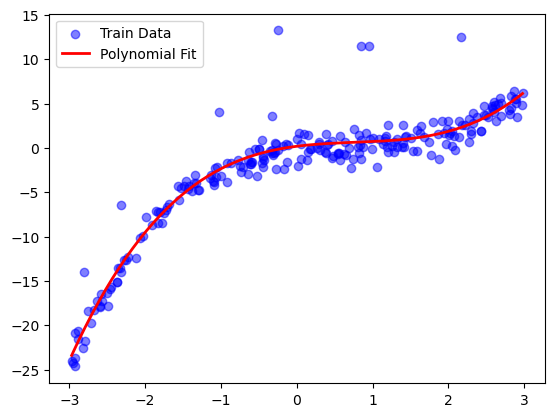

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate smooth X values for plotting the curve
X_plot = np.linspace(X_train.min(), X_train.max(), 200).reshape(-1, 1)

# Apply same polynomial transform
X_plot_poly = model_poly.transform(X_plot)

# Predict
y_plot = reg.predict(X_plot_poly)

# Plot
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.5)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Fit')
plt.legend()
plt.show()


In [48]:
def mse(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    if y_true.shape != y_pred.shape:
        raise ValueError("y_true and y_pred must have the same shape")
    return np.mean((y_true - y_pred) ** 2)

def r2(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    if y_true.shape != y_pred.shape:
        raise ValueError("y_true and y_pred must have the same shape")
    
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)

    return 1 - ss_res/ss_tot



In [49]:
y_train_pred = reg.predict(X_train_poly)
y_test_pred = reg.predict(X_test_poly)


print(f'train error: {mse(y_train, y_train_pred)}')
print(f'test error: {mse(y_test, y_test_pred)}')

print("R2 train :", r2(y_train, y_train_pred))
print("R2 test  :", r2(y_test, y_test_pred))

train error: 3.7994074857766424
test error: 4.245594931994885
R2 train : 0.9220121525641772
R2 test  : 0.9423854571632165
